Group members: Vidhi Sikarwar, Parisa Chatrath, Diya Singh, Sia Malik

In [307]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics

In [308]:
df = pd.read_excel("Bank_Marketing_Data_Final.xlsx")    #reading datafile
df.head()    #checking data is properly loaded

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,credit_score,customer_service_rating,marketing_spend_eur,website_visits,app_downloaded
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,no,402,3,131.87,6,yes
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,no,735,5,128.70,5,yes
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,-1,0,unknown,no,570,4,55.57,6,yes
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,-1,0,unknown,no,406,1,277.07,7,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,-1,0,unknown,no,371,4,75.87,3,no


In [309]:
categorical = [col for col in df.columns if df[col].dtype == 'object']

print(categorical)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y', 'app_downloaded']


# Correlation Analysis with Categorical and Continuous Variables

In [310]:
## cleaning data - removing categorical data to check correlation

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Drop all categorical columns except 'y'
cols_to_drop = [col for col in categorical_cols if col != 'y']
df_cleaned = df.drop(columns=cols_to_drop)

# Optional: View result
df_cleaned.head()

,age,balance,day,duration,campaign,pdays,previous,y,credit_score,customer_service_rating,marketing_spend_eur,website_visits
0,58,2143,5,261,1,-1,0,no,402,3,131.87,6
1,44,29,5,151,1,-1,0,no,735,5,128.70,5
2,33,2,5,76,1,-1,0,no,570,4,55.57,6
3,47,1506,5,92,1,-1,0,no,406,1,277.07,7
4,33,1,5,198,1,-1,0,no,371,4,75.87,3


In [311]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_cleaned['y'] = le.fit_transform(df_cleaned['y'])
## label-encoded the y column

In [312]:
df_cleaned.head()

,age,balance,day,duration,campaign,pdays,previous,y,credit_score,customer_service_rating,marketing_spend_eur,website_visits
0,58,2143,5,261,1,-1,0,0,402,3,131.87,6
1,44,29,5,151,1,-1,0,0,735,5,128.70,5
2,33,2,5,76,1,-1,0,0,570,4,55.57,6
3,47,1506,5,92,1,-1,0,0,406,1,277.07,7
4,33,1,5,198,1,-1,0,0,371,4,75.87,3


                              age   balance       day  duration  campaign  \
age                      1.000000  0.097783 -0.009120 -0.004648  0.004760   
balance                  0.097783  1.000000  0.004503  0.021560 -0.014578   
day                     -0.009120  0.004503  1.000000 -0.030206  0.162490   
duration                -0.004648  0.021560 -0.030206  1.000000 -0.084570   
campaign                 0.004760 -0.014578  0.162490 -0.084570  1.000000   
pdays                   -0.023758  0.003435 -0.093044 -0.001565 -0.088628   
previous                 0.001288  0.016674 -0.051710  0.001203 -0.032855   
y                        0.025155  0.052838 -0.028348  0.394521 -0.073172   
credit_score            -0.006792 -0.008081  0.000757 -0.006478 -0.003050   
customer_service_rating -0.002339 -0.003518 -0.009201 -0.000601 -0.003148   
marketing_spend_eur     -0.005697  0.000104  0.002991 -0.000922 -0.000857   
website_visits          -0.002144  0.004756  0.003508  0.001385  0.005213   

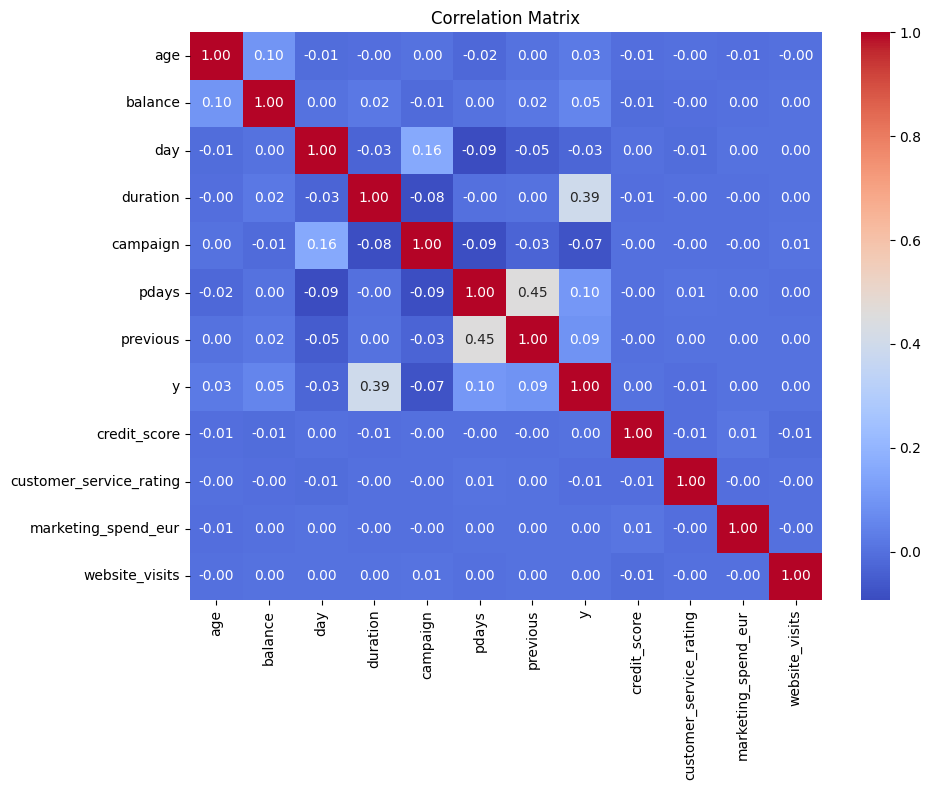

In [313]:
correlation_matrix = df_cleaned.corr()

# Display correlation matrix
print(correlation_matrix)

# Optional: plot heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

There is a strong correlation between the duration of call and y, other variables that may be mildly correlated are: pday, previous and balance

**Checking significance of categorical variables to analyse correlation between y and categorical variables:**

In [314]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
# Select categorical features (excluding 'y')
cat_cols = df.select_dtypes(include=['object', 'category']).columns
cat_cols = [col for col in cat_cols if col != 'y']

# Encode categorical features
le = LabelEncoder()
df_encoded = df.copy()
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Chi-squared test (requires non-negative values)
X_cat = df_encoded[cat_cols]
y = df_encoded['y']

# Chi-squared test expects normalized input
X_cat_scaled = MinMaxScaler().fit_transform(X_cat)

chi2_scores, p_values = chi2(X_cat_scaled, y)

# Display results
chi2_results = pd.DataFrame({
    'Feature': cat_cols,
    'Chi2 Score': chi2_scores,
    'p-value': p_values
}).sort_values(by='Chi2 Score', ascending=False)

print(chi2_results)

          Feature  Chi2 Score        p-value
6         contact  626.907055  2.352400e-138
4         housing  388.949715   1.401285e-86
5            loan  176.516137   2.793375e-40
8        poutcome   34.892493   3.484216e-09
2       education   30.205908   3.885242e-08
3         default   22.313875   2.315277e-06
0             job   16.586569   4.647901e-05
1         marital   14.883033   1.143872e-04
7           month    4.029264   4.471744e-02
9  app_downloaded    0.397987   5.281305e-01


We conclude that month and app_downloaded are not significant predictors of y and hence are dropped in further analysis and mode

# Label Encoding the data


In [315]:
categorical = [col for col in df.columns if df[col].dtype == 'object']

print(categorical)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y', 'app_downloaded']


In [316]:
#LabelEncoding

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#Pass on the functionality of the libary LabelEncoder to another variable
labelencoder = LabelEncoder()

# Loop through all columns and encode categorical ones
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = labelencoder.fit_transform(df[col])

        # Print the mapping for the column
        print(f"\nLabel Encoding for '{col}':")
        for i, cls in enumerate(labelencoder.classes_):
          print(f"  {i} -> {cls}")

# Check the result
df.head()


Label Encoding for 'job':
  0 -> admin.
  1 -> blue-collar
  2 -> entrepreneur
  3 -> housemaid
  4 -> management
  5 -> retired
  6 -> self-employed
  7 -> services
  8 -> student
  9 -> technician
  10 -> unemployed
  11 -> unknown

Label Encoding for 'marital':
  0 -> divorced
  1 -> married
  2 -> single

Label Encoding for 'education':
  0 -> primary
  1 -> secondary
  2 -> tertiary
  3 -> unknown

Label Encoding for 'default':
  0 -> no
  1 -> yes

Label Encoding for 'housing':
  0 -> no
  1 -> yes

Label Encoding for 'loan':
  0 -> no
  1 -> yes

Label Encoding for 'contact':
  0 -> cellular
  1 -> telephone
  2 -> unknown

Label Encoding for 'month':
  0 -> apr
  1 -> aug
  2 -> dec
  3 -> feb
  4 -> jan
  5 -> jul
  6 -> jun
  7 -> mar
  8 -> may
  9 -> nov
  10 -> oct
  11 -> sep

Label Encoding for 'poutcome':
  0 -> failure
  1 -> other
  2 -> success
  3 -> unknown

Label Encoding for 'y':
  0 -> no
  1 -> yes

Label Encoding for 'app_downloaded':
  0 -> no
  1 -> yes


,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,credit_score,customer_service_rating,marketing_spend_eur,website_visits,app_downloaded
0,58,4,1,2,0,2143,1,0,2,5,...,1,-1,0,3,0,402,3,131.87,6,1
1,44,9,2,1,0,29,1,0,2,5,...,1,-1,0,3,0,735,5,128.70,5,1
2,33,2,1,1,0,2,1,1,2,5,...,1,-1,0,3,0,570,4,55.57,6,1
3,47,1,1,3,0,1506,1,0,2,5,...,1,-1,0,3,0,406,1,277.07,7,0
4,33,11,2,3,0,1,0,0,2,5,...,1,-1,0,3,0,371,4,75.87,3,0


# **Explaratory Data Analysis**

Mean: 4.339762447192055
Median: 4.0


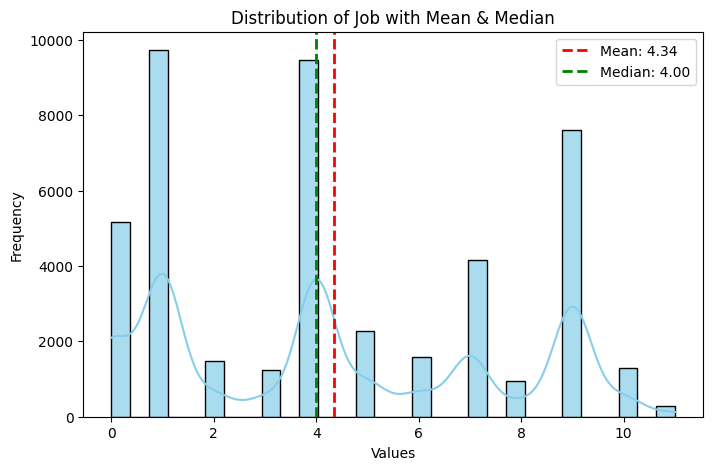

In [317]:
column = df["job"]

# Calculate mean and median
mean_value = column.mean()
median_value = column.median()
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")

plt.figure(figsize=(8, 5))
sns.histplot(column, bins=30, kde=True, color='skyblue', alpha=0.7)

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value:.2f}")
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_value:.2f}")

# Add labels and legend
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of Job with Mean & Median")
plt.legend()

# Show the plot
plt.show()

Mean: 40.93621021432837
Median: 39.0


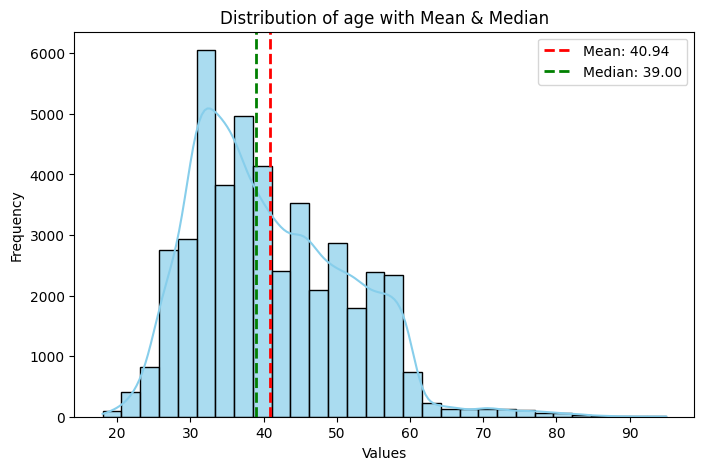

In [318]:
column = dataset["age"]
# Calculate mean and median
mean_value = column.mean()
median_value = column.median()
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")

plt.figure(figsize=(8, 5))
sns.histplot(column, bins=30, kde=True, color='skyblue', alpha=0.7)

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value:.2f}")
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_value:.2f}")

# Add labels and legend
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of age with Mean & Median")
plt.legend()

# Show the plot
plt.show()

Mean: 1.224812545619429
Median: 1.0


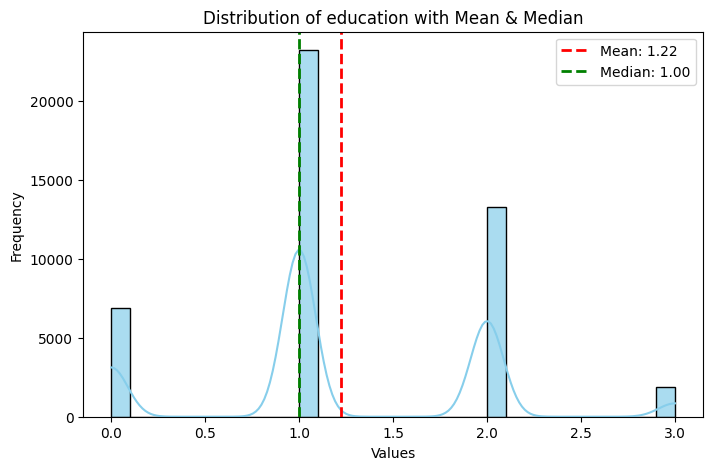

In [319]:
column = df["education"]
# Calculate mean and median
mean_value = column.mean()
median_value = column.median()
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")

plt.figure(figsize=(8, 5))
sns.histplot(column, bins=30, kde=True, color='skyblue', alpha=0.7)

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value:.2f}")
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_value:.2f}")

# Add labels and legend
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of education with Mean & Median")
plt.legend()

# Show the plot
plt.show()

Mean: 1.167724668775298
Median: 1.0


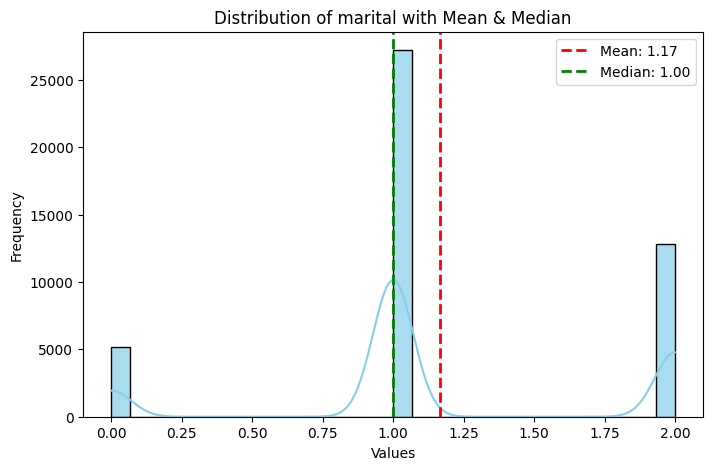

In [320]:
column = df["marital"]
# Calculate mean and median
mean_value = column.mean()
median_value = column.median()
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")

plt.figure(figsize=(8, 5))
sns.histplot(column, bins=30, kde=True, color='skyblue', alpha=0.7)

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value:.2f}")
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_value:.2f}")

# Add labels and legend
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of marital with Mean & Median")
plt.legend()

# Show the plot
plt.show()

Mean: 0.018026586450200173
Median: 0.0


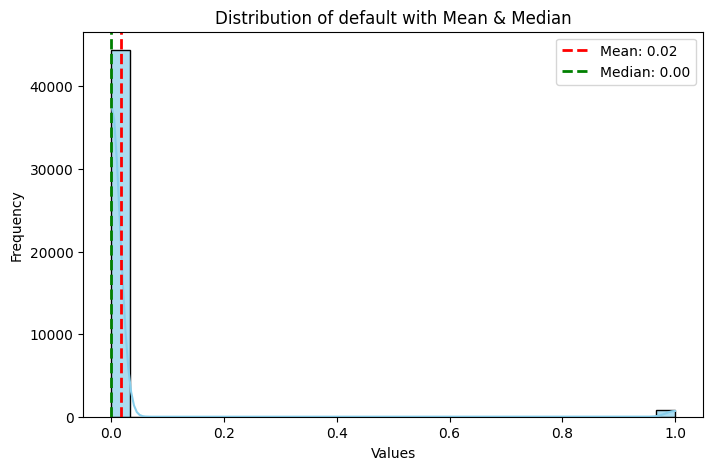

In [321]:
column = df["default"]
# Calculate mean and median
mean_value = column.mean()
median_value = column.median()
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")

plt.figure(figsize=(8, 5))
sns.histplot(column, bins=30, kde=True, color='skyblue', alpha=0.7)

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value:.2f}")
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_value:.2f}")

# Add labels and legend
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of default with Mean & Median")
plt.legend()

# Show the plot
plt.show()

Mean: 1362.2720576850766
Median: 448.0


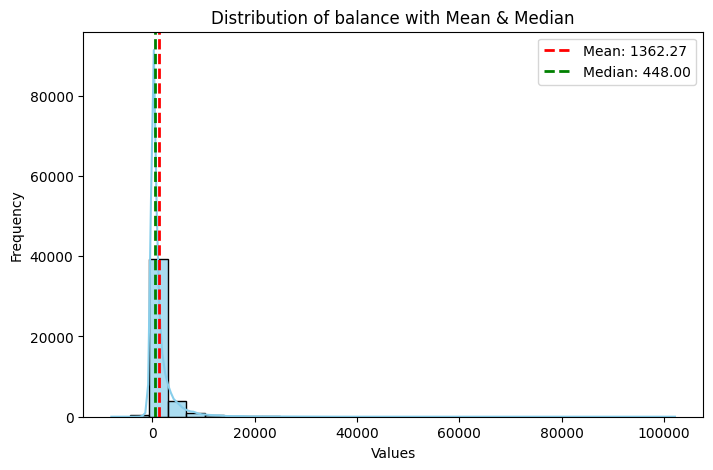

In [322]:
column = df["balance"]
# Calculate mean and median
mean_value = column.mean()
median_value = column.median()
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")

plt.figure(figsize=(8, 5))
sns.histplot(column, bins=30, kde=True, color='skyblue', alpha=0.7)

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value:.2f}")
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_value:.2f}")

# Add labels and legend
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of balance with Mean & Median")
plt.legend()

# Show the plot
plt.show()

Mean: 0.5558381809736569
Median: 1.0


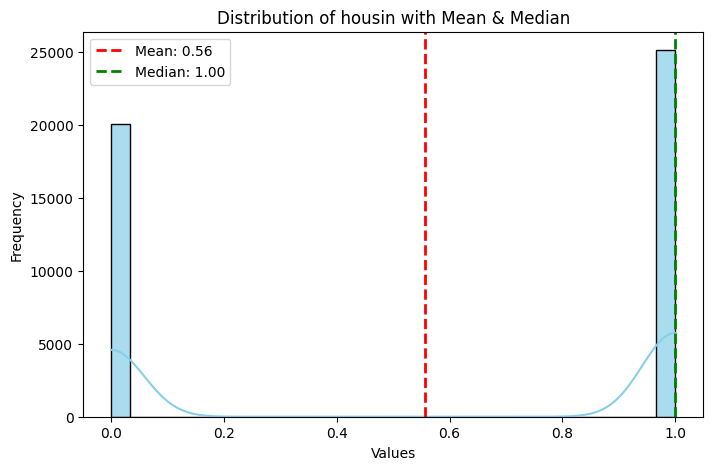

In [323]:
column = df["housing"]
# Calculate mean and median
mean_value = column.mean()
median_value = column.median()
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")

plt.figure(figsize=(8, 5))
sns.histplot(column, bins=30, kde=True, color='skyblue', alpha=0.7)

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value:.2f}")
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_value:.2f}")

# Add labels and legend
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of housin with Mean & Median")
plt.legend()

# Show the plot
plt.show()

Mean: 0.16022649355245405
Median: 0.0


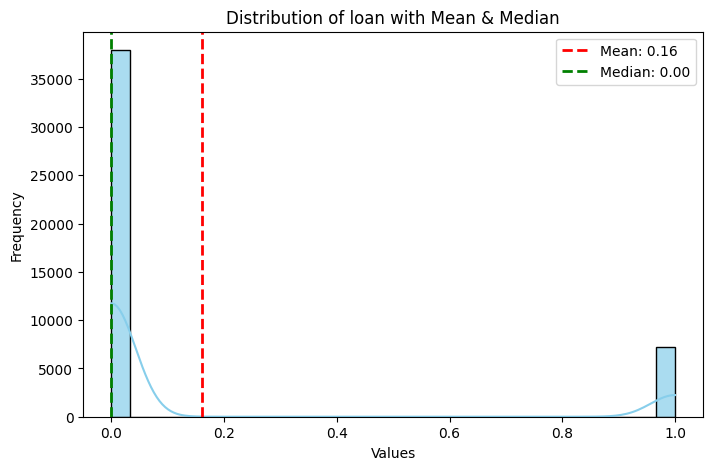

In [324]:
column = df["loan"]
# Calculate mean and median
mean_value = column.mean()
median_value = column.median()
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")

plt.figure(figsize=(8, 5))
sns.histplot(column, bins=30, kde=True, color='skyblue', alpha=0.7)

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value:.2f}")
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_value:.2f}")

# Add labels and legend
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of loan with Mean & Median")
plt.legend()

# Show the plot
plt.show()

Mean: 258.1630797814691
Median: 180.0


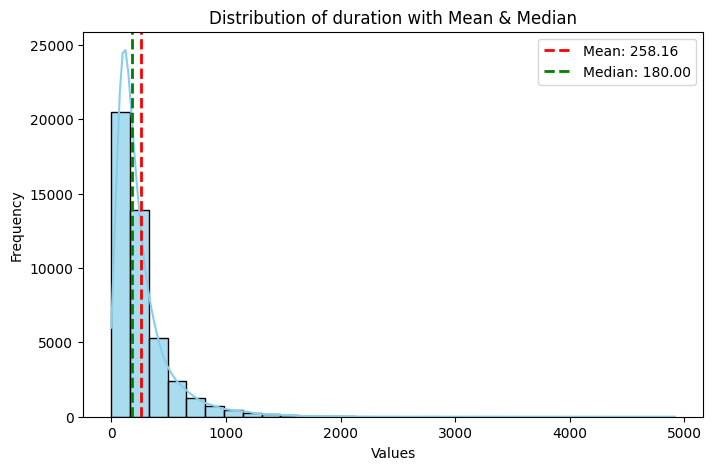

In [325]:
column = df["duration"]
# Calculate mean and median
mean_value = column.mean()
median_value = column.median()
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")

plt.figure(figsize=(8, 5))
sns.histplot(column, bins=30, kde=True, color='skyblue', alpha=0.7)

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value:.2f}")
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_value:.2f}")

# Add labels and legend
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of duration with Mean & Median")
plt.legend()

# Show the plot
plt.show()

Mean: 2.763840658246887
Median: 2.0


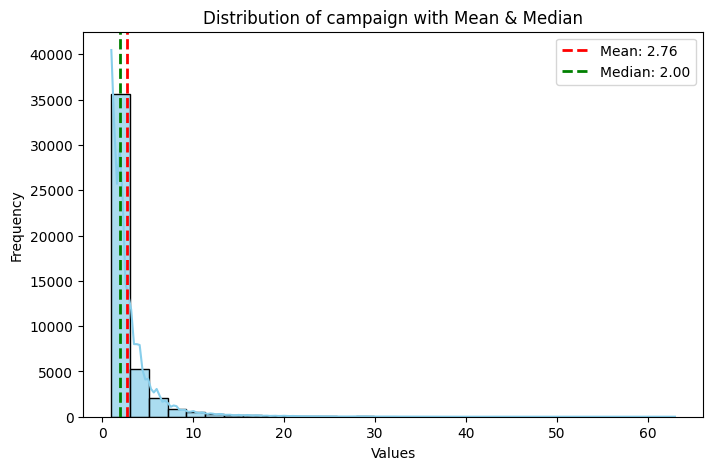

In [326]:
column = df["campaign"]
# Calculate mean and median
mean_value = column.mean()
median_value = column.median()
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")

plt.figure(figsize=(8, 5))
sns.histplot(column, bins=30, kde=True, color='skyblue', alpha=0.7)

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value:.2f}")
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_value:.2f}")

# Add labels and legend
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of campaign with Mean & Median")
plt.legend()

# Show the plot
plt.show()

Mean: 40.19782796222158
Median: -1.0


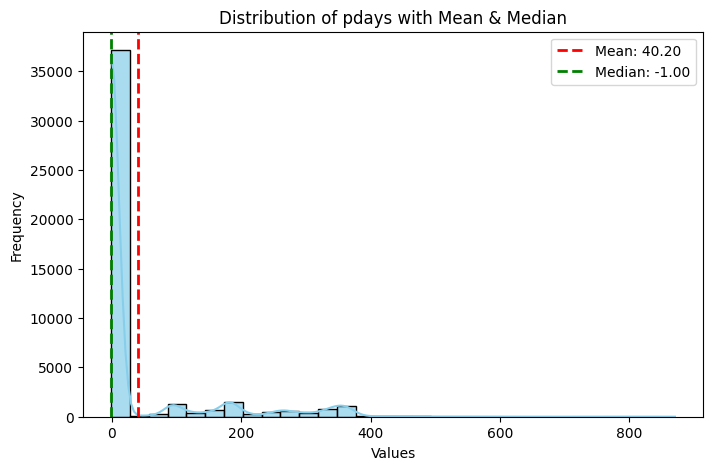

In [327]:
column = df["pdays"]
# Calculate mean and median
mean_value = column.mean()
median_value = column.median()
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")

plt.figure(figsize=(8, 5))
sns.histplot(column, bins=30, kde=True, color='skyblue', alpha=0.7)

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value:.2f}")
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_value:.2f}")

# Add labels and legend
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of pdays with Mean & Median")
plt.legend()

# Show the plot
plt.show()

Mean: 0.5803233726305546
Median: 0.0


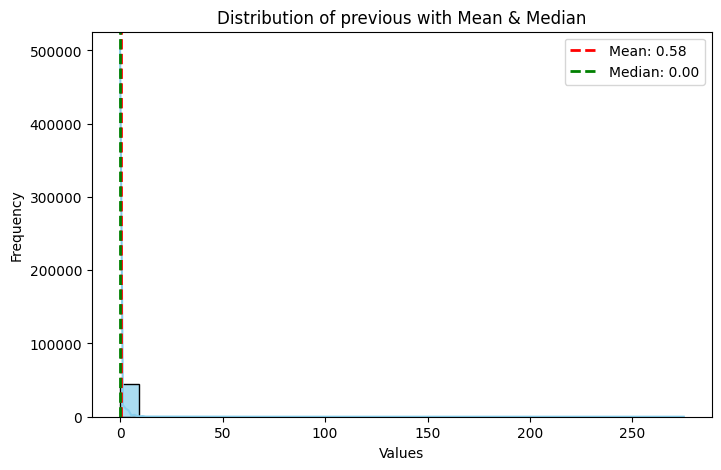

In [328]:
column = df["previous"]
# Calculate mean and median
mean_value = column.mean()
median_value = column.median()
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")

plt.figure(figsize=(8, 5))
sns.histplot(column, bins=30, kde=True, color='skyblue', alpha=0.7)

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value:.2f}")
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_value:.2f}")

# Add labels and legend
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of previous with Mean & Median")
plt.legend()

# Show the plot
plt.show()

Mean: 601.0956846785075
Median: 601.0


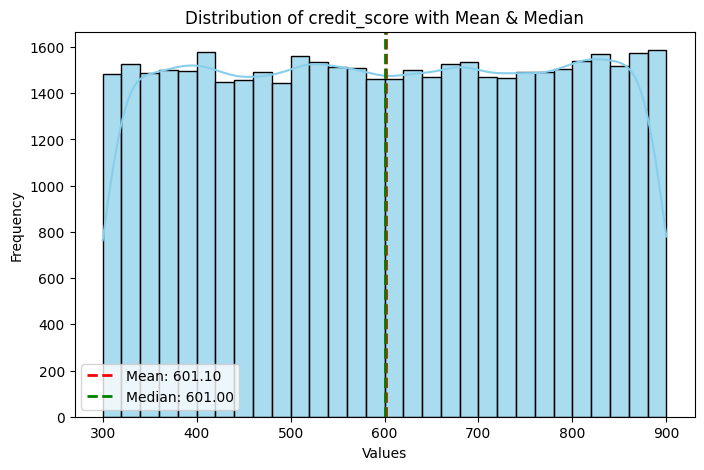

In [329]:
column = df["credit_score"]
# Calculate mean and median
mean_value = column.mean()
median_value = column.median()
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")

plt.figure(figsize=(8, 5))
sns.histplot(column, bins=30, kde=True, color='skyblue', alpha=0.7)

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value:.2f}")
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_value:.2f}")

# Add labels and legend
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of credit_score with Mean & Median")
plt.legend()

# Show the plot
plt.show()

Mean: 2.995001216518104
Median: 3.0


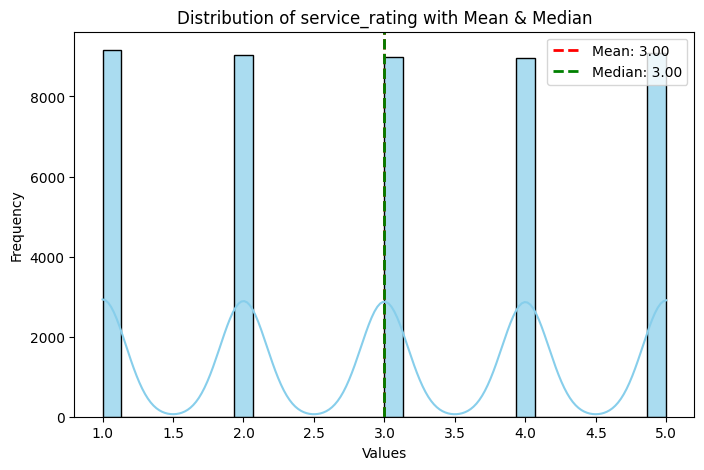

In [330]:
column = df["customer_service_rating"]
# Calculate mean and median
mean_value = column.mean()
median_value = column.median()
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")

plt.figure(figsize=(8, 5))
sns.histplot(column, bins=30, kde=True, color='skyblue', alpha=0.7)

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value:.2f}")
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_value:.2f}")

# Add labels and legend
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of service_rating with Mean & Median")
plt.legend()

# Show the plot
plt.show()

Mean: 0.6986131693614386
Median: 1.0


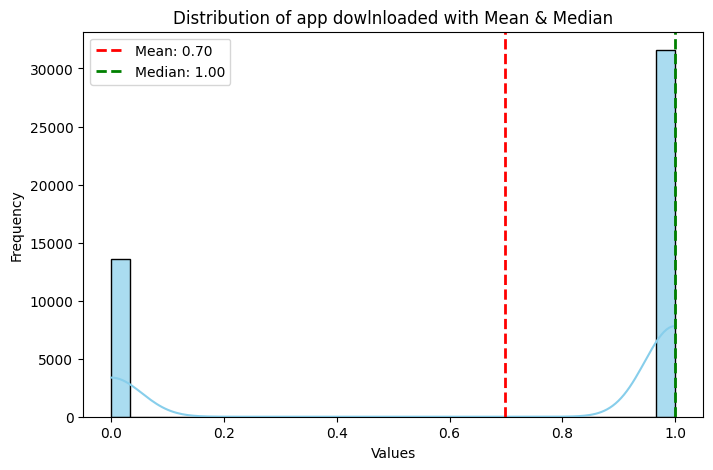

In [331]:
column = df["app_downloaded"]
# Calculate mean and median
mean_value = column.mean()
median_value = column.median()
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")

plt.figure(figsize=(8, 5))
sns.histplot(column, bins=30, kde=True, color='skyblue', alpha=0.7)

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value:.2f}")
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_value:.2f}")

# Add labels and legend
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of app dowlnloaded with Mean & Median")
plt.legend()

# Show the plot
plt.show()

Mean: 175.03685408418306
Median: 175.2


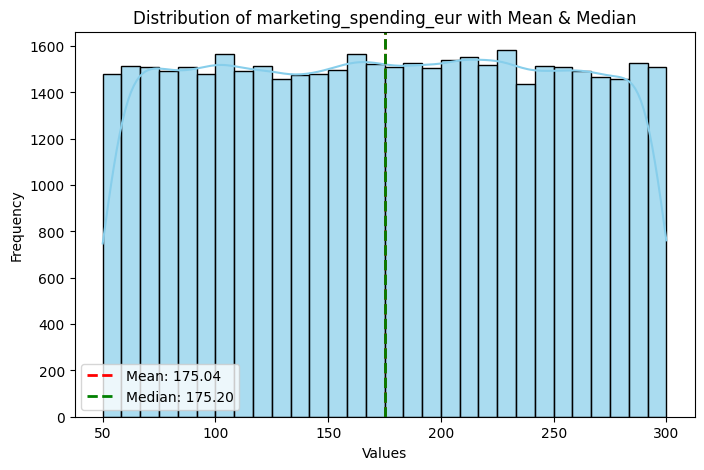

In [332]:
column = df["marketing_spend_eur"]
# Calculate mean and median
mean_value = column.mean()
median_value = column.median()
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")

plt.figure(figsize=(8, 5))
sns.histplot(column, bins=30, kde=True, color='skyblue', alpha=0.7)

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value:.2f}")
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_value:.2f}")

# Add labels and legend
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of marketing_spending_eur with Mean & Median")
plt.legend()

# Show the plot
plt.show()

Mean: 4.9925460617991195
Median: 5.0


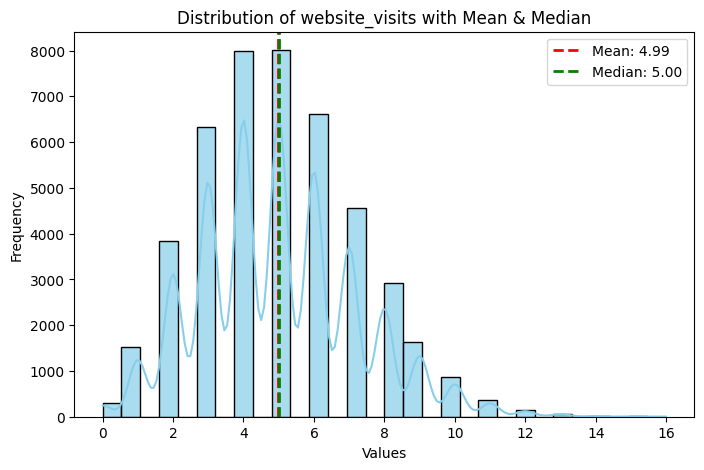

In [333]:
column = df["website_visits"]
# Calculate mean and median
mean_value = column.mean()
median_value = column.median()
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")

plt.figure(figsize=(8, 5))
sns.histplot(column, bins=30, kde=True, color='skyblue', alpha=0.7)

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value:.2f}")
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_value:.2f}")

# Add labels and legend
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of website_visits with Mean & Median")
plt.legend()

# Show the plot
plt.show()

# Preparing the Data to run models

In [334]:
# Print all columns with their index positions
for idx, col in enumerate(df.columns):
    print(f"{idx}: {col}")

0: age
1: job
2: marital
3: education
4: default
5: balance
6: housing
7: loan
8: contact
9: day
10: month
11: duration
12: campaign
13: pdays
14: previous
15: poutcome
16: y
17: credit_score
18: customer_service_rating
19: marketing_spend_eur
20: website_visits
21: app_downloaded


In [335]:
#Seperating into predictor and target variables - dropping day and month because they're junk variables

X = df.iloc[:, [0,1,2,3,4,5,6,7,8,11,12,13,14,15,17,18,19,20,21]]
display(X.head())

y = df.iloc[:,16]
display (y.head())

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,credit_score,customer_service_rating,marketing_spend_eur,website_visits,app_downloaded
0,58,4,1,2,0,2143,1,0,2,261,1,-1,0,3,402,3,131.87,6,1
1,44,9,2,1,0,29,1,0,2,151,1,-1,0,3,735,5,128.70,5,1
2,33,2,1,1,0,2,1,1,2,76,1,-1,0,3,570,4,55.57,6,1
3,47,1,1,3,0,1506,1,0,2,92,1,-1,0,3,406,1,277.07,7,0
4,33,11,2,3,0,1,0,0,2,198,1,-1,0,3,371,4,75.87,3,0


,y
0,0
1,0
2,0
3,0
4,0


In [336]:
#Getting a standardised set of the labelencoded data

#Scale the data
from sklearn.preprocessing import MinMaxScaler # Z = X-XMin / (Xmax-Xmin)

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

# If you want it back as a DataFrame (with same column names)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Check the result
X_scaled.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,credit_score,customer_service_rating,marketing_spend_eur,website_visits,app_downloaded
0,0.519481,0.363636,0.5,0.666667,0.0,0.092259,1.0,0.0,1.0,0.053070,0.0,0.0,0.0,1.0,0.170000,0.50,0.327399,0.3750,1.0
1,0.337662,0.818182,1.0,0.333333,0.0,0.073067,1.0,0.0,1.0,0.030704,0.0,0.0,0.0,1.0,0.725000,1.00,0.314716,0.3125,1.0
2,0.194805,0.181818,0.5,0.333333,0.0,0.072822,1.0,1.0,1.0,0.015453,0.0,0.0,0.0,1.0,0.450000,0.75,0.022125,0.3750,1.0
3,0.376623,0.090909,0.5,1.000000,0.0,0.086476,1.0,0.0,1.0,0.018707,0.0,0.0,0.0,1.0,0.176667,0.00,0.908338,0.4375,0.0
4,0.194805,1.000000,1.0,1.000000,0.0,0.072812,0.0,0.0,1.0,0.040260,0.0,0.0,0.0,1.0,0.118333,0.75,0.103345,0.1875,0.0


In [337]:
#One Hot Encoding the data
from sklearn.compose import ColumnTransformer

categorical = ['job', 'marital', 'education', 'contact', 'poutcome']

# Create a list of transformers for each categorical column
transformers = [(col, OneHotEncoder(drop='first'), [X.columns.get_loc(col)]) for col in categorical]

# Build the ColumnTransformer
ct = ColumnTransformer(transformers, remainder='passthrough')

# Apply it on the dataframe
X_onehot = ct.fit_transform(X)

# Get the new column names
column_names = ct.get_feature_names_out()

column_names

array(['job__job_1', 'job__job_2', 'job__job_3', 'job__job_4',
       'job__job_5', 'job__job_6', 'job__job_7', 'job__job_8',
       'job__job_9', 'job__job_10', 'job__job_11', 'marital__marital_1',
       'marital__marital_2', 'education__education_1',
       'education__education_2', 'education__education_3',
       'contact__contact_1', 'contact__contact_2', 'poutcome__poutcome_1',
       'poutcome__poutcome_2', 'poutcome__poutcome_3', 'remainder__age',
       'remainder__default', 'remainder__balance', 'remainder__housing',
       'remainder__loan', 'remainder__duration', 'remainder__campaign',
       'remainder__pdays', 'remainder__previous',
       'remainder__credit_score', 'remainder__customer_service_rating',
       'remainder__marketing_spend_eur', 'remainder__website_visits',
       'remainder__app_downloaded'], dtype=object)

In [338]:
# Convert result back to a DataFrame with column names
columns_onehot = [
    'job1', 'job2', 'job3', 'job4', 'job5', 'job6', 'job7', 'job8', 'job9', 'job10', 'job11',
    'marital1', 'marital2',
    'education1', 'education2', 'education3',
    'contact1', 'contact2',
    'poutcome1', 'poutcome2', 'poutcome3',
    'age', 'default', 'balance', 'housing', 'loan', 'duration',
    'campaign', 'pdays', 'previous',
    'credit_score', 'customer_service_rating', 'marketing_spend_eur',
    'website_visits', 'app_downloaded'
]

X_onehot = pd.DataFrame(X_onehot, columns=columns_onehot)

# Check the result
X_onehot.head()

,job1,job2,job3,job4,job5,job6,job7,job8,job9,job10,...,loan,duration,campaign,pdays,previous,credit_score,customer_service_rating,marketing_spend_eur,website_visits,app_downloaded
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,261.0,1.0,-1.0,0.0,402.0,3.0,131.87,6.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,151.0,1.0,-1.0,0.0,735.0,5.0,128.70,5.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,76.0,1.0,-1.0,0.0,570.0,4.0,55.57,6.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,92.0,1.0,-1.0,0.0,406.0,1.0,277.07,7.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,198.0,1.0,-1.0,0.0,371.0,4.0,75.87,3.0,0.0


In [339]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler # Z = X-XMin / (Xmax-Xmin)

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
X_onehotscaled = scaler.fit_transform(X_onehot)

# If you want it back as a DataFrame (with same column names)
X_onehotscaled = pd.DataFrame(X_onehotscaled, columns=X_onehot.columns)

# Check the result
X_onehotscaled.head()

,job1,job2,job3,job4,job5,job6,job7,job8,job9,job10,...,loan,duration,campaign,pdays,previous,credit_score,customer_service_rating,marketing_spend_eur,website_visits,app_downloaded
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.053070,0.0,0.0,0.0,0.170000,0.50,0.327399,0.3750,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.030704,0.0,0.0,0.0,0.725000,1.00,0.314716,0.3125,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.015453,0.0,0.0,0.0,0.450000,0.75,0.022125,0.3750,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.018707,0.0,0.0,0.0,0.176667,0.00,0.908338,0.4375,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.040260,0.0,0.0,0.0,0.118333,0.75,0.103345,0.1875,0.0


# KMeans Clustering

In [340]:
from sklearn.cluster import KMeans
cluster_range = range(2,20)
cluster_errors = [] #distance between center of cluster and all points inside the cluster
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters,random_state = 42)
    clusters.fit(X_scaled)
    labels = clusters.labels_
    centroids = clusters.labels_ #capture the cluster labels
    centroids = clusters.cluster_centers_ #capture the centroids
    cluster_errors.append( clusters.inertia_ ) #capture the inertia

  # combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame({ "num_clusters":cluster_range, "cluster_errors": cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,2,56771.388417
1,3,50734.747804
2,4,47464.553371
3,5,43528.617438
4,6,41378.010472
5,7,40455.505947
6,8,37962.242784
7,9,37360.211654
8,10,36491.705355
9,11,34189.528023


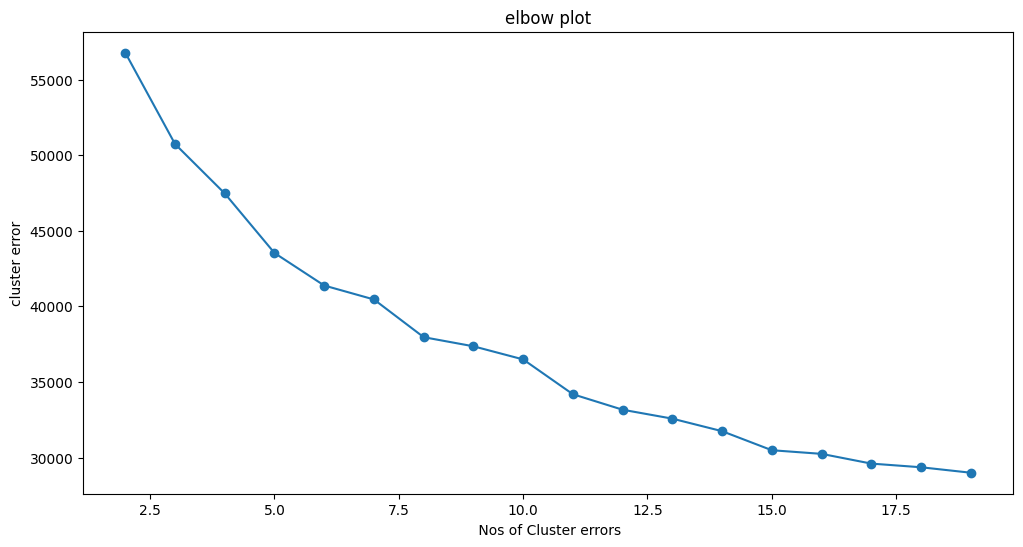

In [341]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel(' Nos of Cluster errors')
plt.ylabel('cluster error')
plt.title("elbow plot")
plt.show()

In [342]:
# The elbow plot shows that 8 might be a good choice for K

In [343]:
cluster = KMeans( n_clusters = 8,random_state = 42 )
cluster.fit(X_scaled)

KMeans(random_state=42)

In [344]:
# Get the centroids ... using function cluster_centers_
centroids = cluster.cluster_centers_
centroids

array([[ 2.70843060e-01,  3.70384473e-01,  5.90517743e-01,
         4.05274384e-01,  1.15183246e-02,  8.49365452e-02,
         1.00000000e+00, -2.60347299e-14,  1.10529378e-02,
         5.39917119e-02,  2.40687572e-02,  1.03878935e-01,
         4.14151991e-03,  6.96179950e-01,  5.01012798e-01,
         4.99534613e-01,  4.95589541e-01,  3.12267307e-01,
         1.00000000e+00],
       [ 3.58787707e-01,  3.77555315e-01,  5.25793651e-01,
         3.62764550e-01,  2.57936508e-02,  8.67177392e-02,
        -2.84217094e-14,  1.48478836e-01,  9.25595238e-01,
         4.80724490e-02,  2.68283837e-02,  3.73426957e-03,
         1.61135161e-04,  9.93055556e-01,  5.08107363e-01,
         4.97602513e-01,  5.03785221e-01,  3.08325066e-01,
         1.00000000e+00],
       [ 3.27264246e-01,  4.35384045e-01,  5.90204082e-01,
         4.34013605e-01,  1.68163265e-02,  8.80160766e-02,
        -6.17284002e-14,  1.36653061e-01,  2.21795918e-01,
         5.25779021e-02,  2.95141540e-02,  3.20179742e-02,
    

In [345]:
#let us put the raw centroid values into a dataframe under respective columns
centroid_df = pd.DataFrame( centroids, columns = list(X_scaled))
centroid_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,credit_score,customer_service_rating,marketing_spend_eur,website_visits,app_downloaded
0,0.270843,0.370384,0.590518,0.405274,0.011518,0.084937,1.000000e+00,-2.603473e-14,0.011053,0.053992,0.024069,0.103879,0.004142,0.696180,0.501013,0.499535,0.495590,0.312267,1.000000e+00
1,0.358788,0.377555,0.525794,0.362765,0.025794,0.086718,-2.842171e-14,1.484788e-01,0.925595,0.048072,0.026828,0.003734,0.000161,0.993056,0.508107,0.497603,0.503785,0.308325,1.000000e+00
2,0.327264,0.435384,0.590204,0.434014,0.016816,0.088016,-6.172840e-14,1.366531e-01,0.221796,0.052578,0.029514,0.032018,0.001779,0.887673,0.501674,0.500286,0.502658,0.311939,-3.763656e-14
3,0.277103,0.367111,0.545319,0.381018,0.030442,0.079960,9.995422e-01,1.000000e+00,0.369306,0.051189,0.028046,0.055048,0.002379,0.826734,0.505154,0.505264,0.504401,0.313802,6.894026e-01
4,0.280115,0.344380,0.580262,0.368083,0.019920,0.083184,1.000000e+00,-1.751377e-14,0.959329,0.052566,0.031372,0.001943,0.000037,0.997344,0.503546,0.496057,0.503071,0.311359,1.000000e+00


In [346]:
prediction=cluster.predict(X_scaled)

from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_scaled, prediction)

print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.15884075163058475


Quality of clusters is quite poor, so we will not use them in our models

# Logistic Regression

In [347]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats

In [348]:
# Add constant for VIF
X_vif = sm.add_constant(X_onehotscaled)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i+1) for i in range(X.shape[1])]
print("\n--- VIF Values ---")
print(vif_data)

# --- Fit Logistic Regression ---
X_onehotscaled_train, X_onehotscaled_test, y_train, y_test = train_test_split(X_onehotscaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_onehotscaled_train, y_train)

# --- Evaluation ---
y_pred = model.predict(X_onehotscaled_test)
print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))


--- VIF Values ---
                    Feature       VIF
0                       age  2.505590
1                       job  1.300779
2                   marital  1.286142
3                 education  3.018123
4                   default  1.699166
5                   balance  1.321482
6                   housing  1.646210
7                      loan  1.255135
8                   contact  2.089470
9                  duration  1.236211
10                 campaign  1.092505
11                    pdays  2.531104
12                 previous  2.878116
13                 poutcome  2.604074
14             credit_score  3.387001
15  customer_service_rating  1.303362
16      marketing_spend_eur  1.077978
17           website_visits  1.221198
18           app_downloaded  1.338306

--- Confusion Matrix ---
[[7786  166]
 [ 752  339]]

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.67    

In [349]:
# Accuracy = 90%

# CART

In [350]:
from sklearn.tree import DecisionTreeClassifier #Import Decision Tree Classifier

In [351]:
#Train Test Split

#Using X (unscaled, no onehot encoding) because CART is not based on distance
#Spilliting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# test size = 0.2 ---> 20% of data is test rest is train, defining random state to synchronize randomization

In [352]:
#Using For loop to check accuracy for different max depth values
maxdepth = [2,3,4,5,6,7,8,9,10,11,12]
accuracy = []
for i in maxdepth:         #Running CART for each value in maxdepth. Code explained in next box
  clf = DecisionTreeClassifier(max_depth=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy.append(metrics.accuracy_score(y_test, y_pred))

maxdepth_vs_accuracy = pd.DataFrame({'maxdepth' : maxdepth,
                                'accuracy' : accuracy,})
maxdepth_vs_accuracy

,maxdepth,accuracy
0,2,0.887758
1,3,0.892292
2,4,0.896495
3,5,0.895720
4,6,0.894062
5,7,0.894393
6,8,0.893066
7,9,0.894283
8,10,0.889970
9,11,0.885326


In [353]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=4)
#indicating we want max 4 levels of depth, as according to the table this is where we get highest accuracy

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [354]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8964945261528254


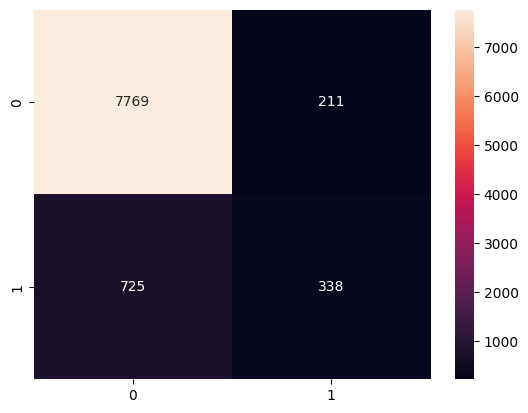

In [355]:
#Making the confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='');

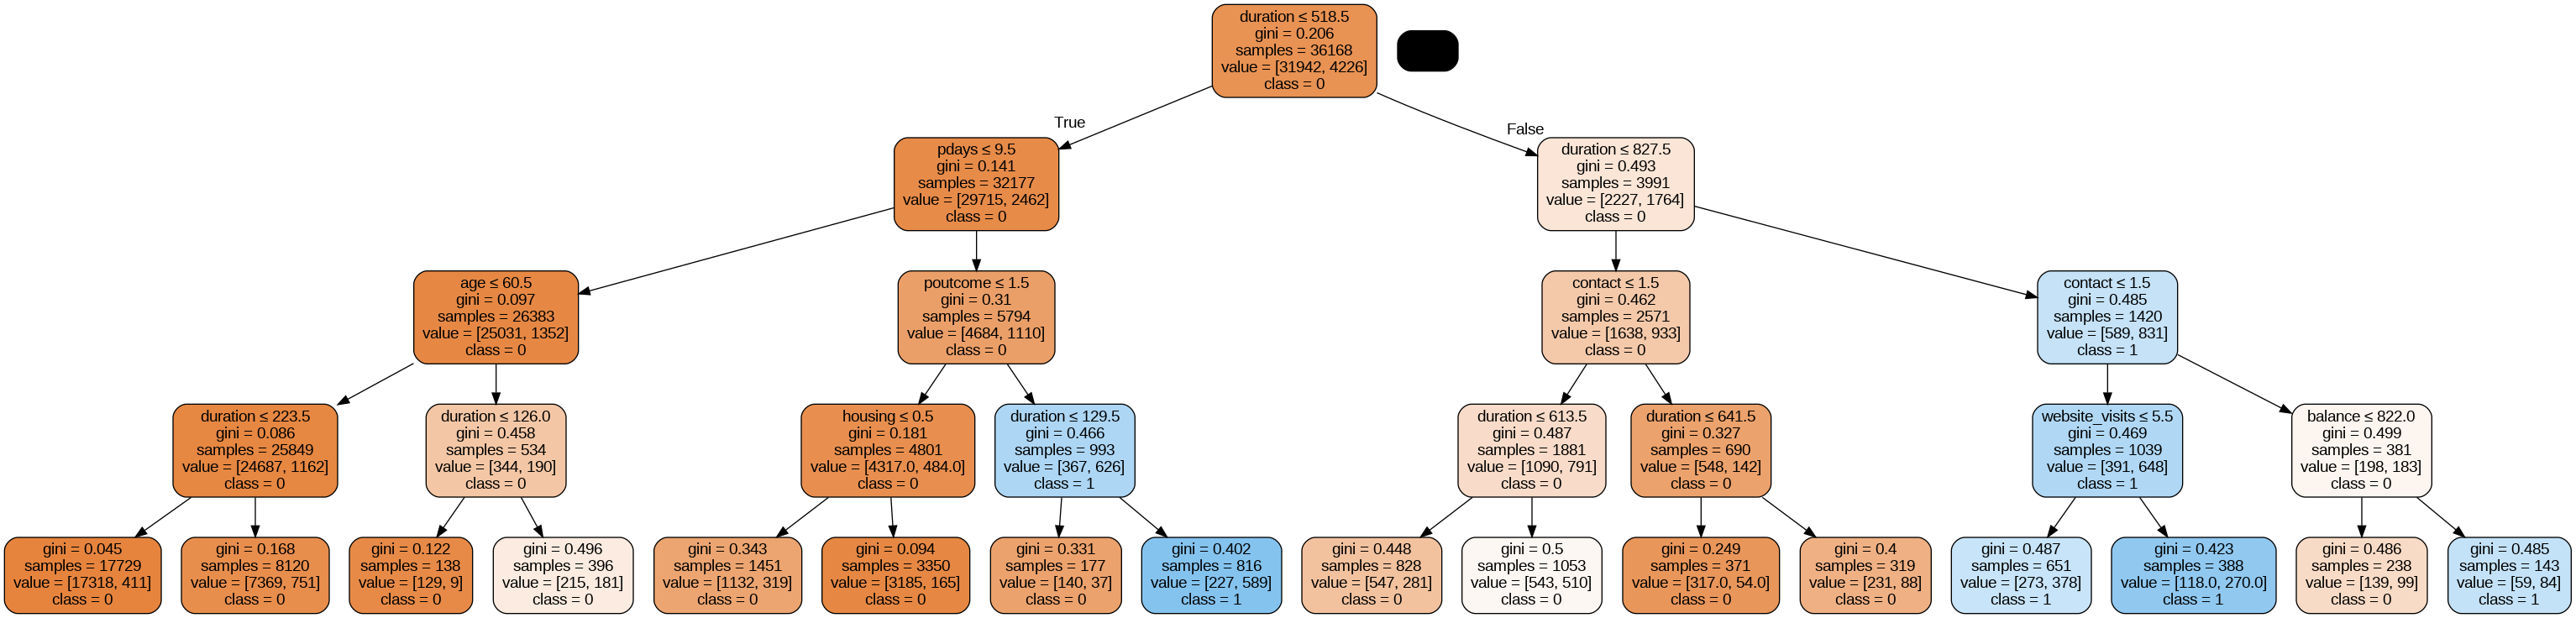

In [356]:
!pip install six
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
feature_cols = X.columns.tolist()
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('deliveryontime.png')
Image(graph.create_png())

# KNN

In [357]:
#Spilliting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
Z_train, Z_test, y_train, y_test = train_test_split(X_onehotscaled, y, test_size = 0.2, random_state = 0)
# test size = 0.2 ---> 20% of data is test rest is train, defining random state to synchronize randomization

In [358]:
#Testing accuracy for different values of k
#comparing number of clusters chosen to the corresponding cluster errors

from sklearn.neighbors import KNeighborsClassifier

k_range = range(3,61,2)
accuracy = []

#A for loop for testing the data using different values of k in the specified range
for k in k_range:
  NNH = KNeighborsClassifier(metric = 'euclidean', n_neighbors=k)
  model_KNN = NNH.fit(Z_train, y_train)
  y_pred = model_KNN.predict(Z_test)
  accuracy.append(metrics.accuracy_score(y_test, y_pred))   #capture the accuracy for given k

#combining the k_range and accuracy into a dataframe
k_df = pd.DataFrame({"k_value":k_range, "accuracy": accuracy})
k_df.head()

,k_value,accuracy
0,3,0.870065
1,5,0.880128
2,7,0.885657
3,9,0.886542
4,11,0.887427


In [369]:
max_accuracy = k_df.loc[k_df['accuracy'].idxmax()]
max_accuracy

,10
k_value,23.000000
accuracy,0.890302


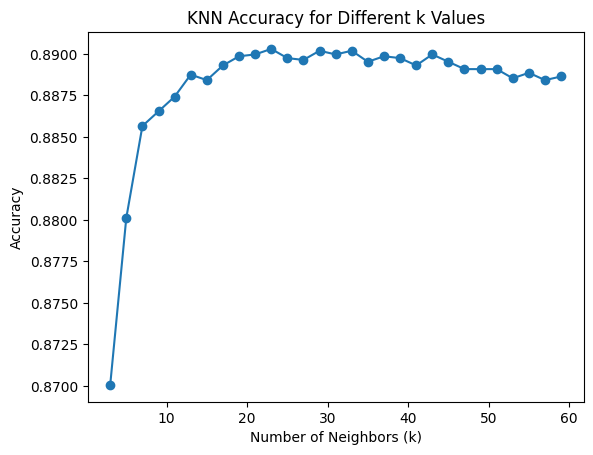

In [360]:
#Plotting the accuracy against k_value

import matplotlib.pyplot as plt

plt.plot(k_df["k_value"], k_df["accuracy"], marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.show()

In [372]:
#Clearly k=23 seems to give the most accurate results
NNH = KNeighborsClassifier(metric = 'euclidean', n_neighbors=23)
#specifying no. of nearest neighbors as 23

model_KNN = NNH.fit(Z_train, y_train)

Accuracy: 0.8903018909653876


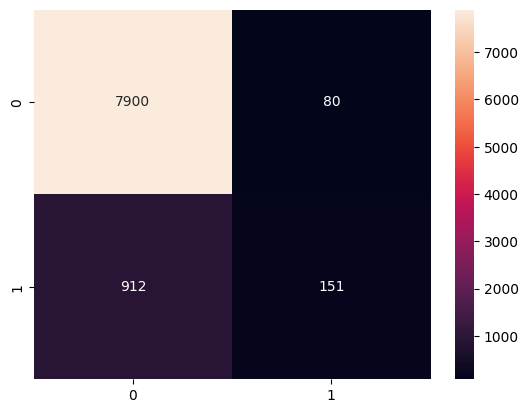

In [373]:
import seaborn as sns
from sklearn import metrics
y_pred = model_KNN.predict(Z_test)
y_pred = (y_pred>0.50)     #Converting predictions to binary (although KNN already returns discrete 0/1)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='');

# Naive Bayes

In [363]:
#Spilliting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
Z_train, Z_test, y_train, y_test = train_test_split(X_onehotscaled, y, test_size = 0.2, random_state = 0)
# test size = 0.2 ---> 20% of data is test rest is train, defining random state to synchronize randomization

In [364]:
from sklearn.naive_bayes import GaussianNB
nativeClassifier=GaussianNB()
nb_classifier = nativeClassifier.fit(Z_train, y_train)
y_pred = nb_classifier.predict(Z_test)

Accuracy: 0.8255003870396992


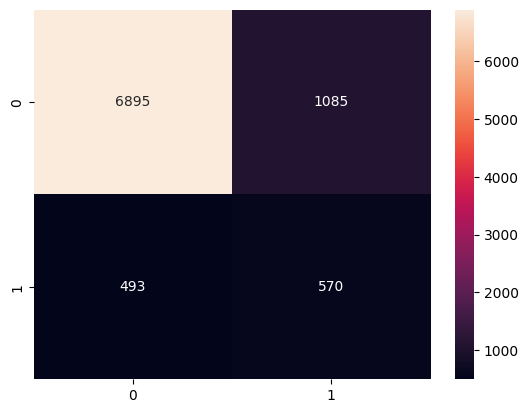

In [365]:
import seaborn as sns
from sklearn import metrics
y_pred = nb_classifier.predict(Z_test)
y_pred = (y_pred>0.50)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
#Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='');

# Neural Network

In [366]:
#train Test Split

#Spilliting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_onehotscaled, y, test_size = 0.2, random_state = 0)
# test size = 0.2 ---> 20% of data is test rest is train, defining random state to synchronize randomization

In [367]:
# import keras libraries and packages
import keras
# sequential because all these layers are in a sequence
from keras.models import Sequential
# Dense implies hidden layers that we cannot access from outside
from keras.layers import Dense
# initialising the Deep Learning Model
classifier = Sequential()
# we are classifying 0 and 1s that why it is called classifier
## adding the input layer and hidden layer
## input_dimensions = 35
## the hidden layer has 34 units, weights are taken randomly from a uniform distribution and activation is ReLu
classifier.add(Dense(units = 29,kernel_initializer = 'uniform', activation = 'relu', input_dim = 35))
## kernel initializer helps python pick up weights, we call it weights but engineers call it kernel
## adding the second hidden layer
classifier.add(Dense(units = 29, kernel_initializer = 'uniform', activation = 'relu'))
# adding the output layer
## here the activation function is sigmoid as it is binary classification problem
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
## compiling the DNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.8882 - loss: 0.3254
Epoch 2/100
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9002 - loss: 0.2455
Epoch 3/100
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9014 - loss: 0.2414
Epoch 4/100
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9003 - loss: 0.2372
Epoch 5/100
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9037 - loss: 0.2331
Epoch 6/100
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9030 - loss: 0.2360
Epoch 7/100
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9031 - loss: 0.2329
Epoch 8/100
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9027 - loss: 0.2344
Epoch 9/100
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9064 - loss: 0.2269
Epoch 10/100
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9055 - loss: 0.2279
Epoch 11/100
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9032 - loss: 0.2331
Epoch 12/

In [368]:
# Evaluate the model on the test set
loss, accuracy = classifier.evaluate(X_test, y_test)

# Print the accuracy
print(f"Test Accuracy: {accuracy:.4f}")  # Print accuracy with 4 decimal places

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8922 - loss: 0.2694
Test Accuracy: 0.8873


**Results:**

Logistic Regression: 90%


CART: 89.6%


KNN: 89.03%


Naive Bayes: 82.6%


Neural Network: 89.12%

